In [1]:
#Loading the required libraries
import pandas as pd
import numpy as np

In [2]:
#Choosing the dataset
data=pd.read_csv("C:/Users/ASUS/Downloads/student-mat.csv")

In [3]:
#Viewing first 5 rows of dataset
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#Getting final grade of the students
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

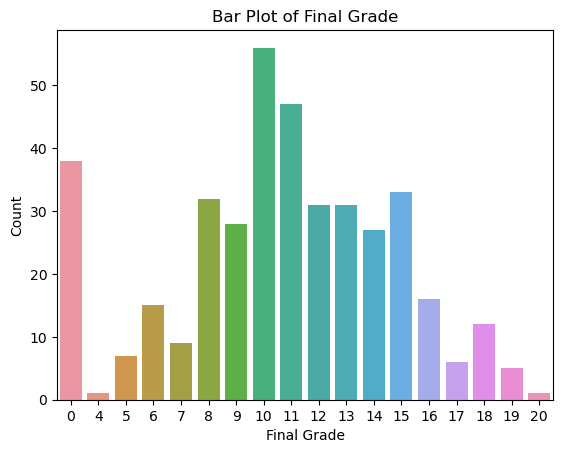

In [5]:
#Understanding Final grade with the help of barplot
import seaborn as sns
import matplotlib.pyplot as plt
count_data = data['G3'].value_counts().reset_index()
count_data.columns = ['G3', 'Count']
sns.barplot(x='G3', y='Count', data=count_data)
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.title('Bar Plot of Final Grade')
plt.show()


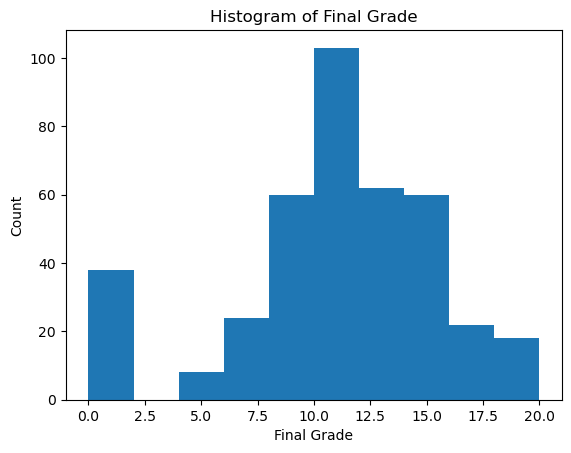

In [6]:
#Understanding Final grade with the help of histogram
import matplotlib.pyplot as plt
plt.hist(data['G3'], bins=10)
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.title('Histogram of Final Grade')
plt.show()


In [7]:
#Viewing the columns we have
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
#Analysing the no of rows and columns in the dataset
data.shape

(395, 33)

In [9]:
#Checking whether any nulls values are present in the dataset
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [10]:
#Finding sum of null values in the dataset
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
#Analyzing no of male and female students
male_students=len(data[data['sex']=='M'])
female_students=len(data[data['sex']=='F'])
print("No of male students",male_students)
print("No of female students",female_students)

No of male students 187
No of female students 208


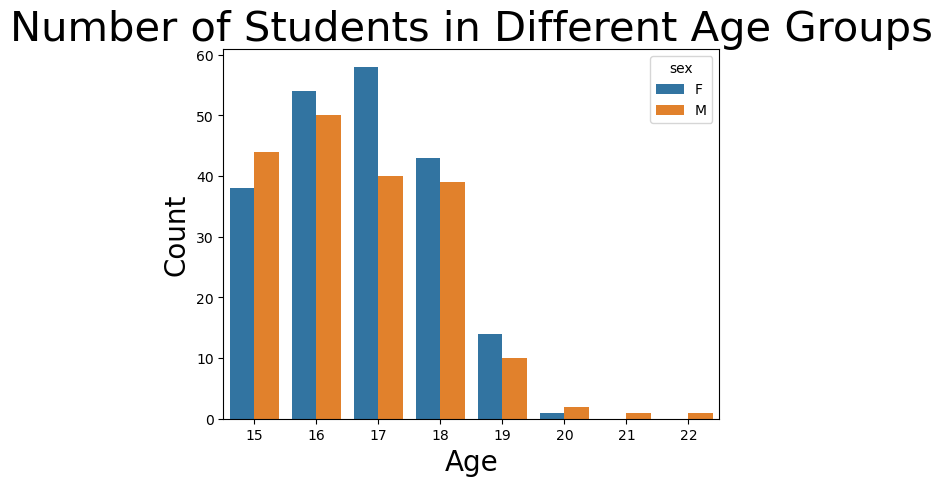

In [12]:
#Viewing students in different age groups with the help of barplot
b = sns.countplot(x='age', hue='sex', data=data)
b.set_title('Number of Students in Different Age Groups', fontsize=30)
b.set_xlabel('Age', fontsize=20)
b.set_ylabel('Count', fontsize=20)
plt.show()


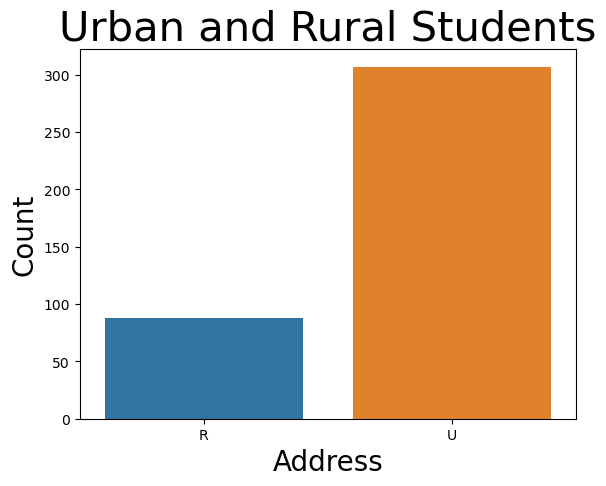

In [13]:
#Analyzing the students from urban areas and rural areas
data['address'] = data['address'].astype('category')
b = sns.countplot(x='address', data=data)
b.set_title('Urban and Rural Students', fontsize=30)
b.set_xlabel('Address', fontsize=20)
b.set_ylabel('Count', fontsize=20)
plt.show()


In [14]:
#Getting average of their marks
data['GradeAvg']=data['G1']+data['G2']+data['G3']/3

In [15]:
#Creating find_grade function to assign with the rules of grades
def find_grade(data):
    grades=[]
    for row in data['GradeAvg']:
        if row>=(0.9*data['GradeAvg'].max()):
            grades.append('1')
        elif row>=(0.7*data['GradeAvg'].max()):
            grades.append('2')
        elif row<(0.7*data['GradeAvg'].max()): 
            grades.append('3')
    data['GradeAvg']=grades
    return data

In [16]:
data_dum=find_grade(data)

In [17]:
#Dropping school and age 
data_dum.drop(['school','age'],axis=1,inplace=True)

In [18]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,3


In [19]:
#Understanding the columns present
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [20]:
#Changing the data into catogorical ones

#yes/no values:
d={'yes':1,'no':0}
data_dum['schoolsup']=data_dum['schoolsup'].map(d)
data_dum['famsup']=data_dum['famsup'].map(d)
data_dum['paid']=data_dum['paid'].map(d)
data_dum['activites']=data_dum['activities'].map(d)
data_dum['nursery']=data_dum['nursery'].map(d)
data_dum['higher']=data_dum['higher'].map(d)
data_dum['internet']=data_dum['internet'].map(d)
data_dum['romantic']=data_dum['romantic'].map(d)

#Gender:
d={'F':1,'M':0}
data_dum['sex']=data_dum['sex'].map(d)

#Jobs:
d={'teacher':0,'health':1, 'services':2, 'at_home':3, 'other':4}
data_dum['Mjob']=data_dum['Mjob'].map(d)
data_dum['Fjob']=data_dum['Fjob'].map(d)

#Reasons:
d={'home':0,'reputation':1, 'course':2, 'other':3}
data_dum['reason']=data_dum['reason'].map(d)

#Guardian:
d={'mother':0,'father':1, 'other':2}
data_dum['guardian']=data_dum['guardian'].map(d)

#Size of family
d={'GT3':0,'LE3':1}
data_dum['famsize']=data_dum['famsize'].map(d)

#Address
d={'U':0,'R':1}
data_dum['address']=data_dum['address'].map(d)

#Family status
d={'T':0,'A':1}
data_dum['Pstatus']=data_dum['Pstatus'].map(d)

In [21]:
for column in data_dum.columns:
    if data_dum[column].dtype.name == 'category':
        blank_cells = data_dum[column].isnull() | (data_dum[column] == '')
        mode_value = data_dum[column].mode()[0]
        data_dum.loc[blank_cells, column] = mode_value

In [22]:
data_dum = data_dum.dropna()

In [23]:
#Splitting the train and test values
from sklearn.model_selection import train_test_split
x=data_dum.drop("G3",axis=1)
y=data_dum['G3']

In [24]:
data_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [25]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

In [34]:
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
non_numeric_columns

Index(['address'], dtype='object')

In [28]:
#Famsize
column_with_U = 'famsize'
mean_value = np.mean(pd.to_numeric(X_train[column_with_U], errors='coerce'))
X_train[column_with_U] = pd.to_numeric(X_train[column_with_U], errors='coerce').fillna(mean_value)

#Pstatus
column_with_V = 'Pstatus'
mean_value = np.mean(pd.to_numeric(X_train[column_with_V], errors='coerce'))
X_train[column_with_V] = pd.to_numeric(X_train[column_with_V], errors='coerce').fillna(mean_value)

#Activities
column_with_W = 'activities'
mean_value = np.mean(pd.to_numeric(X_train[column_with_W], errors='coerce'))
X_train[column_with_W] = pd.to_numeric(X_train[column_with_W], errors='coerce').fillna(mean_value)

#GradeAvg
column_with_X = 'GradeAvg'
mean_value = np.mean(pd.to_numeric(X_train[column_with_X], errors='coerce'))
X_train[column_with_X] = pd.to_numeric(X_train[column_with_X], errors='coerce').fillna(mean_value)

In [42]:
# Handling missing values with mean imputation
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [32]:
# Creating and fitting the Linear Regression model
L = LinearRegression()


LinearRegression()

In [43]:
# Predicting the target variable
y_predict = L.predict(X_test_imputed)

In [44]:
# Printing the predicted values
print(y_predict)

[ 6.31849728 11.60493158  3.7017796   8.99758784  9.0039317  11.96020991
 18.5178168   7.21247974  7.66965428 12.05101144 14.52668297  5.43675438
 13.59806011 12.10347248 14.67752129  8.78419072  6.00606208 11.26733779
 14.01893259  8.32053384 14.10084003 16.35416894 14.07050228  6.23992084
  8.11921768 20.2034386  10.54007627  9.22283177 16.74502164 10.7974377
  9.61775642  7.08975201 15.1573017  12.8753415   5.4151637   4.10167557
 -2.35534997 14.59042155 11.91871328  7.23322416  5.65418642 10.08860332
 14.64129516  7.03333385 17.05206134  9.47618326 11.69403711 13.6541768
 10.51947703 16.00491607 13.89106986 14.5993701  10.43958468  7.61492432
  3.4960092  12.54266818 10.43150174  6.64152055 15.08850247 16.10568509
 12.55315728  7.77770019  8.81117266  3.76088498  3.51103859 16.49509464
  8.51640077  8.93166307  9.26100791 15.88000251  8.33024353  8.27673561
 14.04669846 20.26157434 10.70335143  5.82430384  8.32681677 12.85874412
  4.88190318 11.98359954 13.86162996  4.70676792  8.2

In [45]:
#Finding the accuracy of our model
print(L.score(X_test_imputed,Y_test))

0.7790193149496726
